In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
np.random.seed(42)

import seaborn as sns
sns.set()

In [23]:
def generateData(d = 2, n = 100):
    """
    y = W.T X + b > 0.5 
    
    Parameters:
    ------------
        d : number of features
        n : number of samples
        
    Returns:
    -----------
        X    : Random matrix [d:number of features, n:number of samples]
        y    : W.T X + b > 0.5 [1, n: number of samples]
        veri : Dataframe composed of X.T andy.T 
    """
    
    
    w_secret = np.ones((d,1)) * 0.5 # Boyut: [d: Oznitelik sayisi, 1]
    b_secret = 10 # Boyut: [1, 1]
    
    X = np.random.randint(0,100, size = (d,n))
    h = np.dot(w_secret.T, X) + b_secret 
    y = 1 * (h > 50)

    oznitelik_isimleri = ['mark'+str(i) for i in range(d)] + ['y']
    veri = pd.DataFrame(data = np.concatenate((X,y)).T, columns  = oznitelik_isimleri)
    return X, y, veri

In [35]:
X, y, data = generateData(d = 2, n = 100)

In [36]:
X

array([[98, 43, 85, 90, 34, 64, 98, 46, 77,  2,  0,  4, 89, 13, 26,  8,
        78, 14, 89, 41, 76, 50, 62, 95, 51, 95,  3, 93, 22, 14, 42, 28,
        35, 12, 31, 70, 58, 85, 27, 65, 41, 44, 61, 56,  5, 27, 27, 43,
        83, 29, 61, 74, 91, 88, 61, 96,  0, 26, 61, 76,  2, 69, 71, 26,
         8, 61, 36, 96, 50, 43, 23, 78, 58, 31, 95, 87, 51, 61, 57, 51,
        11, 38,  1,  2, 55, 80, 58,  1,  1, 91, 53, 86, 95, 96,  0, 18,
         1, 52, 43, 89],
       [31, 69, 31, 67, 54, 74, 55, 16, 37, 23, 68, 97, 69, 85, 10, 15,
        96, 72, 58, 69, 79, 92,  2, 19, 58, 35, 18, 89, 66, 18, 19, 95,
        70, 51, 32, 39, 38, 81,  0, 10, 91, 56, 88, 49, 22, 30, 93, 41,
        98,  6, 15, 89, 59,  1,  0, 47, 11, 68, 36, 31,  8, 98, 18, 47,
        79,  2, 19, 23, 53, 32, 23, 74, 71, 35, 37, 83, 98, 88, 98, 24,
        92, 17, 81, 65, 53, 34, 79, 60, 40, 99, 32, 67, 32, 13, 20, 47,
        19,  7,  6, 66]])

In [37]:
y

array([[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]])

In [38]:
data.head()

,mark0,mark1,y
0,98,31,1
1,43,69,1
2,85,31,1
3,90,67,1
4,34,54,1


In [42]:
FailedStudents = data[data.y == 0]
PassedStudents = data[data.y == 1]

Text(13.125, 0.5, 'Final')

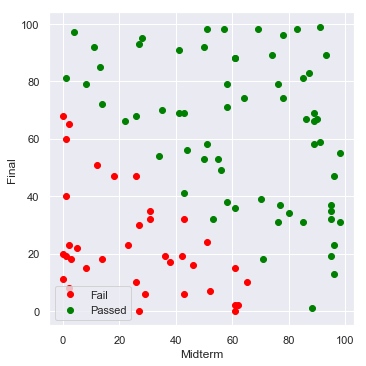

In [46]:
plt.figure(figsize=(5,5))
plt.plot(FailedStudents.mark0, FailedStudents.mark1, 'o', color = 'red', label = "Fail")
plt.plot(PassedStudents.mark0, PassedStudents.mark1, 'o', color = 'green', label = "Passed")
plt.legend()
plt.tight_layout()
plt.xlabel("Midterm")
plt.ylabel("Final")

# Normalize Data
 - Min max scaler

In [47]:
data.head(3)

,mark0,mark1,y
0,98,31,1
1,43,69,1
2,85,31,1


In [48]:
mini = data.min(axis = 0)
maxi = data.max(axis = 0)

data_normal = (data - mini) / (maxi - mini)
data_normal.head()

,mark0,mark1,y
0,1.000000,0.313131,1.0
1,0.438776,0.696970,1.0
2,0.867347,0.313131,1.0
3,0.918367,0.676768,1.0
4,0.346939,0.545455,1.0


In [49]:
def cross_entropy_loss(h,y):
    return - (y* np.log(h) + (1 - y) * (np.log(1 - h)))

In [50]:
h = np.linspace(0,1, 100)
h = h [1:-1]

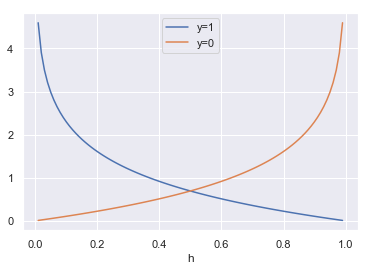

In [53]:
y = 1
cost1 = - np.log(h)
plt.plot(h, cost1, label = "y=1")
y = 0
cost0 = - np.log(1 - h)
plt.plot(h, cost0, label = "y=0")
plt.xlabel('h')
plt.legend()

In [61]:
class Classo():
    def __init__(self, X, y, alpha =  0.0001, iterasyon = 1000):
        self.X = X
        self.y = y
        
        self.d = self.X.shape[0] # oznitelik sayisi
        self.n = self.X.shape[1] # ornek sayisi
        
        self.alpha = alpha
        self.iterasyon = iterasyon
        
        self.w  = np.random.randn(self.d,1) # random initialization shape [d, 1]
        self.b = np.random.randn() # random initialization shape [1, 1]
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cross_entropy_loss(self, h,y):
        return - (y* np.log(h) + (1 - y) * (np.log(1 - h)))

    def fit(self):
        self.Js = [] 

        for i in range(self.iterasyon):
            # Forward Propagation
            h = self.sigmoid(np.dot(self.w.T, self.X) + self.b)
            # Backward Propagation
            dw = (1 / self.n) * np.dot(self.X, (h-self.y).T) # dJ/dw
            db = (1 / self.n) * np.sum(h-self.y) # dJ/db
            # Gradient Descent
            self.w = self.w - self.alpha * dw
            self.b = self.b - self.alpha * db

            if i%100:
                cost = self.cross_entropy_loss(h, self.y)
                self.Js.append(np.sum(cost))
                
    def predict(self, X_test):
        h = self.sigmoid(np.dot(self.w.T, self.X) + self.b)
        return 1 * (h > 0.5)
        

In [62]:
X = data_normal.iloc[:, :-1].values.T
y = data_normal.iloc[:, -1:].values.T

cls = Classo(X, y , alpha =  0.01, iterasyon = 100000)
cls.fit()

In [63]:
print("Buldugumuz parametre degerleri")
print("\tw = {}.T".format(cls.w.T))
print("\tb = {}".format(cls.b))

Buldugumuz parametre degerleri
	w = [[ 9.60369818 11.09271439]].T
	b = -8.277870050278642


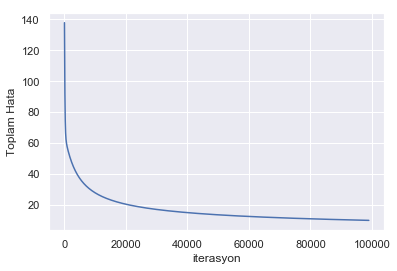

In [64]:
plt.plot(cls.Js)
plt.xlabel('iterasyon'); plt.ylabel('Toplam Hata'); 

In [65]:
h = cls.predict(X)
h

array([[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]])

In [66]:
y

array([[1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
        1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
        1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
        1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 1.]])

In [67]:
y == h

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [68]:
np.sum(h == y)

100

In [75]:
X_test, y_test, veri_test = generateData(d = 2, n = 100)

In [76]:
veri_test_normal = (veri_test - mini) / (maxi - mini)
veri_test_normal.head()

,mark0,mark1,y
0,0.918367,0.525253,1.0
1,0.846939,0.414141,1.0
2,0.234694,0.575758,0.0
3,0.112245,0.383838,0.0
4,0.500000,0.131313,0.0


In [77]:
X_test = veri_test_normal.iloc[:, :-1].values.T
y = veri_test_normal.iloc[:, -1:].values.T

h = cls.predict(X_test)
h

array([[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]])

In [78]:
y

array([[1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
        0., 0., 1., 1.]])

In [79]:
y == h

array([[ True,  True, False, False, False,  True, False,  True,  True,
        False, False, False,  True, False, False, False,  True, False,
         True, False, False, False, False,  True, False,  True, False,
         True,  True,  True, False, False,  True, False,  True, False,
         True,  True,  True,  True,  True,  True, False,  True,  True,
        False,  True,  True,  True,  True, False,  True,  True,  True,
        False, False,  True,  True,  True, False, False, False, False,
        False,  True, False,  True,  True,  True, False, False, False,
         True,  True,  True,  True, False,  True, False, False,  True,
        False,  True, False,  True, False,  True,  True, False,  True,
        False, False, False,  True, False, False,  True,  True, False,
         True]])

In [80]:
np.sum(y == h)

52

In [81]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
h = lr.predict(X_test)

NameError: name 'X_train' is not defined